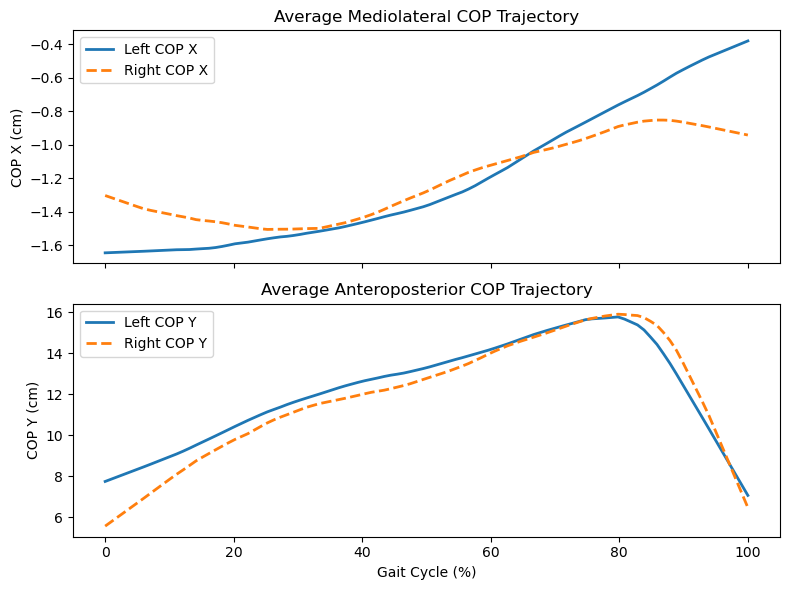

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

# Folder containing all Excel COP data files
data_folder = r"E:\PKNU_Data_2025\Aanlysis\Aanlysis_5nos\COP\COP_data"

# Automatically get all Excel files in the folder
file_paths = glob.glob(os.path.join(data_folder, "*.xlsx"))

def extract_gait_cycles(df, ga_col, cop_x, cop_y):
    phases_x, phases_y = [], []
    hs_idxs = df.index[df[ga_col] == "HES"]
    for start in hs_idxs[:-1]:
        # next toe-off after heel-strike
        tof = df.index[(df.index > start) & (df[ga_col] == "TOF")]
        if len(tof) == 0: continue
        end = tof.min()
        x = df.loc[start:end, cop_x].to_numpy()
        y = df.loc[start:end, cop_y].to_numpy()
        # normalize to 100 points
        phases_x.append(np.interp(np.linspace(0, 1, 100),
                                  np.linspace(0, 1, len(x)), x))
        phases_y.append(np.interp(np.linspace(0, 1, 100),
                                  np.linspace(0, 1, len(y)), y))
    return np.array(phases_x), np.array(phases_y)

# Lists to hold participant means
Lx_list, Ly_list = [], []
Rx_list, Ry_list = [], []

for file in file_paths:
    df = pd.read_excel(file).rename(columns=str.strip)
    if all(col in df.columns for col in ['L_GAIT', 'L_COP_X', 'L_COP_Y', 'R_GAIT', 'R_COP_X', 'R_COP_Y']):
        try:
            Lx, Ly = extract_gait_cycles(df, 'L_GAIT', 'L_COP_X', 'L_COP_Y')
            Rx, Ry = extract_gait_cycles(df, 'R_GAIT', 'R_COP_X', 'R_COP_Y')

            if Lx.size > 0 and Ly.size > 0 and Rx.size > 0 and Ry.size > 0:
                Lx_list.append(Lx.mean(axis=0))
                Ly_list.append(Ly.mean(axis=0))
                Rx_list.append(Rx.mean(axis=0))
                Ry_list.append(Ry.mean(axis=0))
        except Exception as e:
            print(f"⚠️ Skipping file {file} due to error: {e}")
    else:
        print(f"⚠️ Skipping file {file}: missing required columns")

# Compute grand mean trajectories
Lx_mean = np.mean(Lx_list, axis=0)
Ly_mean = np.mean(Ly_list, axis=0)
Rx_mean = np.mean(Rx_list, axis=0)
Ry_mean = np.mean(Ry_list, axis=0)

# Gait cycle phase scale
phase = np.linspace(0, 100, 100)

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# ML (X-axis)
axes[0].plot(phase, Lx_mean, label='Left COP X', linewidth=2)
axes[0].plot(phase, Rx_mean, label='Right COP X', linestyle='--', linewidth=2)
axes[0].set_ylabel('COP X (cm)')
axes[0].set_title('Average Mediolateral COP Trajectory')
axes[0].legend()

# AP (Y-axis)
axes[1].plot(phase, Ly_mean, label='Left COP Y', linewidth=2)
axes[1].plot(phase, Ry_mean, label='Right COP Y', linestyle='--', linewidth=2)
axes[1].set_xlabel('Gait Cycle (%)')
axes[1].set_ylabel('COP Y (cm)')
axes[1].set_title('Average Anteroposterior COP Trajectory')
axes[1].legend()

plt.tight_layout()
plt.show()


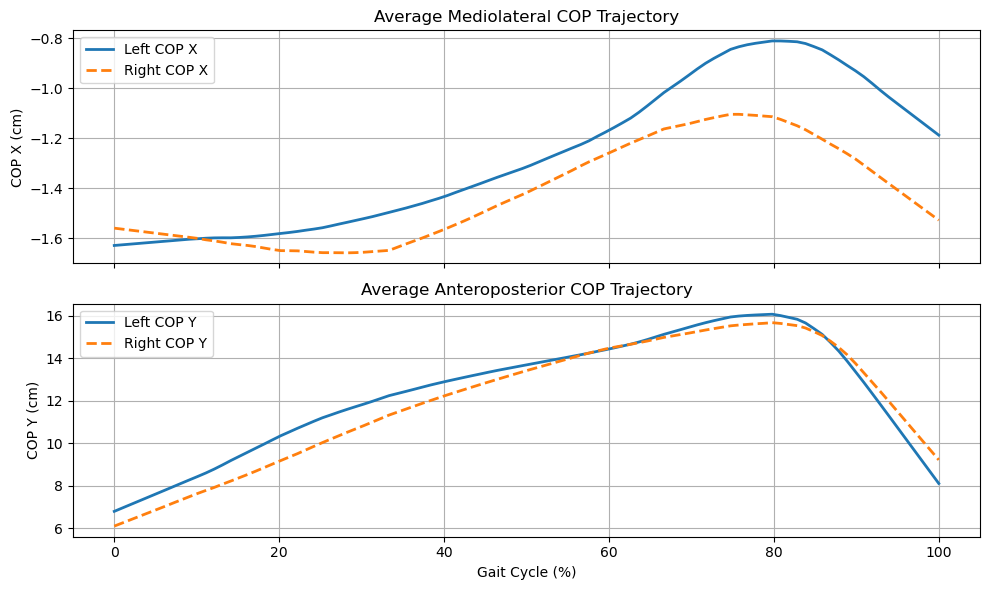

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

# Folder containing all CSV COP data files
data_folder = r"E:\PKNU_Data_2025\Aanlysis\Anlysis_10nos\Data\Re_annotated_data_1"
file_paths = glob.glob(os.path.join(data_folder, "*.csv"))

# Function to extract and normalize gait cycles
def extract_gait_cycles(df, ga_col, cop_x, cop_y):
    phases_x, phases_y = [], []
    hs_idxs = df.index[df[ga_col] == "HES"]
    for start in hs_idxs[:-1]:
        # Find the next TOF after this HES
        tof = df.index[(df.index > start) & (df[ga_col] == "TOF")]
        if len(tof) == 0:
            continue
        end = tof.min()
        x = df.loc[start:end, cop_x].to_numpy()
        y = df.loc[start:end, cop_y].to_numpy()
        if len(x) > 1 and len(y) > 1:
            norm_x = np.interp(np.linspace(0, 1, 100), np.linspace(0, 1, len(x)), x)
            norm_y = np.interp(np.linspace(0, 1, 100), np.linspace(0, 1, len(y)), y)
            phases_x.append(norm_x)
            phases_y.append(norm_y)
    return np.array(phases_x), np.array(phases_y)

# Lists to collect participant mean trajectories
Lx_list, Ly_list, Rx_list, Ry_list = [], [], [], []

# Iterate over all files
for file in file_paths:
    df = pd.read_csv(file).rename(columns=str.strip)  # Ensure no trailing spaces in column names
    if all(col in df.columns for col in ['L_GAIT', 'L_COP_X', 'L_COP_Y', 'R_GAIT', 'R_COP_X', 'R_COP_Y']):
        try:
            Lx, Ly = extract_gait_cycles(df, 'L_GAIT', 'L_COP_X', 'L_COP_Y')
            Rx, Ry = extract_gait_cycles(df, 'R_GAIT', 'R_COP_X', 'R_COP_Y')
            if Lx.size > 0 and Ly.size > 0 and Rx.size > 0 and Ry.size > 0:
                Lx_list.append(Lx.mean(axis=0))
                Ly_list.append(Ly.mean(axis=0))
                Rx_list.append(Rx.mean(axis=0))
                Ry_list.append(Ry.mean(axis=0))
        except Exception as e:
            print(f"⚠️ Skipping file {os.path.basename(file)} due to error: {e}")
    else:
        print(f"⚠️ Skipping file {os.path.basename(file)}: missing required columns")

# Only proceed if data was collected
if Lx_list and Ly_list and Rx_list and Ry_list:
    # Compute grand means
    Lx_mean = np.mean(Lx_list, axis=0)
    Ly_mean = np.mean(Ly_list, axis=0)
    Rx_mean = np.mean(Rx_list, axis=0)
    Ry_mean = np.mean(Ry_list, axis=0)

    # Gait cycle percentage (normalized)
    phase = np.linspace(0, 100, 100)

    # Plotting
    fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

    # Plot COP X (mediolateral)
    axes[0].plot(phase, Lx_mean, label='Left COP X', linewidth=2)
    axes[0].plot(phase, Rx_mean, label='Right COP X', linestyle='--', linewidth=2)
    axes[0].set_ylabel('COP X (cm)')
    axes[0].set_title('Average Mediolateral COP Trajectory')
    axes[0].legend()
    axes[0].grid(True)

    # Plot COP Y (anteroposterior)
    axes[1].plot(phase, Ly_mean, label='Left COP Y', linewidth=2)
    axes[1].plot(phase, Ry_mean, label='Right COP Y', linestyle='--', linewidth=2)
    axes[1].set_xlabel('Gait Cycle (%)')
    axes[1].set_ylabel('COP Y (cm)')
    axes[1].set_title('Average Anteroposterior COP Trajectory')
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()
else:
    print("❌ No valid gait cycles found in the dataset.")


✅ Saved successfully to:
E:\PKNU_Data_2025\Aanlysis\Anlysis_10nos\COP\Average_COP_Trajectories.png


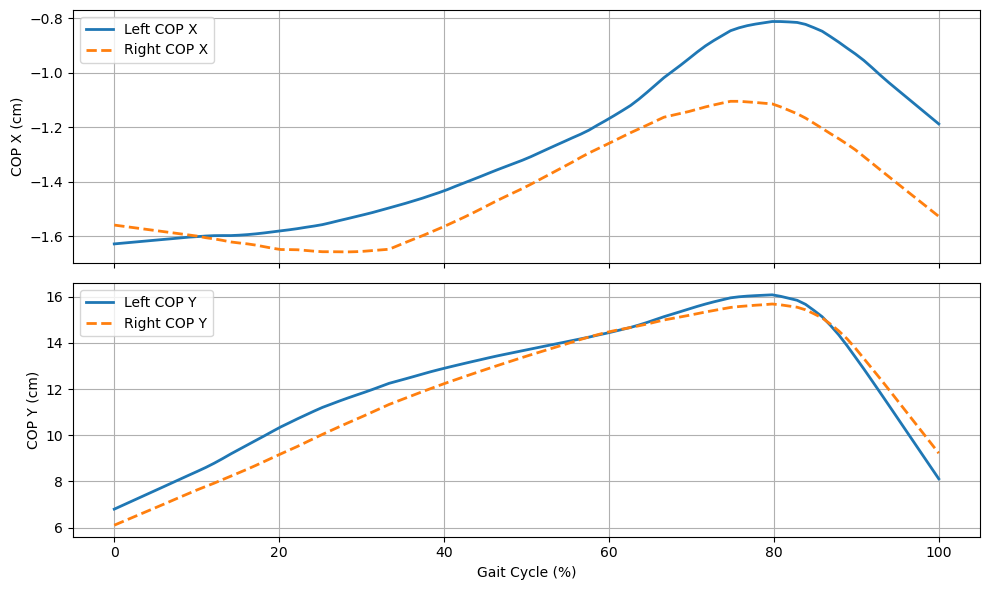

In [23]:
import matplotlib.pyplot as plt

# Gait cycle percentage (normalized)
phase = np.linspace(0, 100, 100)

# Create figure and plot
fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Plot COP X (mediolateral)
axes[0].plot(phase, Lx_mean, label='Left COP X', linewidth=2)
axes[0].plot(phase, Rx_mean, label='Right COP X', linestyle='--', linewidth=2)
axes[0].set_ylabel('COP X (cm)')
axes[0].set_title('')
axes[0].legend()
axes[0].grid(True)

# Plot COP Y (anteroposterior)
axes[1].plot(phase, Ly_mean, label='Left COP Y', linewidth=2)
axes[1].plot(phase, Ry_mean, label='Right COP Y', linestyle='--', linewidth=2)
axes[1].set_xlabel('Gait Cycle (%)')
axes[1].set_ylabel('COP Y (cm)')
axes[1].set_title('')
axes[1].legend()
axes[1].grid(True)

# Finalize layout
plt.tight_layout()

# ✅ SAVE FIRST BEFORE SHOWING
save_path = r"E:\PKNU_Data_2025\Aanlysis\Anlysis_10nos\COP\Average_COP_Trajectories.png"
fig.savefig(save_path, dpi=400, bbox_inches='tight')  # Use fig.savefig, NOT plt.savefig
print(f"✅ Saved successfully to:\n{save_path}")

# Then show
plt.show()
